In [68]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns

from tqdm.notebook import tqdm

%matplotlib inline
plt.style.use('seaborn-whitegrid')

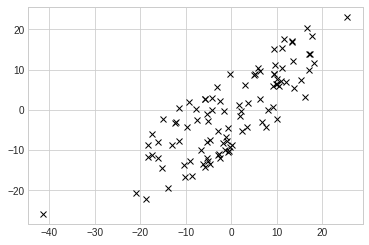

In [69]:
#Dummy Data

X = np.random.randn(100)*10

m = 0.75

Y =  m*X + np.random.randint(-10,10,100)

plt.close()
plt.plot(X, Y, 'x', color='black');

In [ ]:
# Linear Regression

In [78]:
class LR:

  def __init__(self):
    self.model = torch.nn.Linear(1,1)
    self.loss = torch.nn.MSELoss()
    self.epoch_loss = []
    
  def fit(self,input,target,lr=.05,n_iter=1000):
    if not (type(input) == torch.Tensor or type(target) == torch.Tensor):
      RaiseValueError("expected tensor as input and output")
    self.optimizer = torch.optim.Adam(self.model.parameters(),lr)

    for _ in tqdm(range(n_iter)):
      self.optimizer.zero_grad() #avoid accumulation
      
      #forward-pass
      output = self.model(input)
      _loss = self.loss(output,target)

      self.epoch_loss.append(_loss.item())

      _loss.backward() #grad
      self.optimizer.step() #update

  def plot_loss(self):
    plt.plot(self.epoch_loss)

  def predict(self,input):
    return self.model(input)
  
  def show_param(self):
    w = self.model.weight.data.numpy()
    b = self.model.bias.data.numpy()
    print("Weight:",w,"Bias:",b)



Weight: [[0.7537007]] Bias: [-0.88959605]


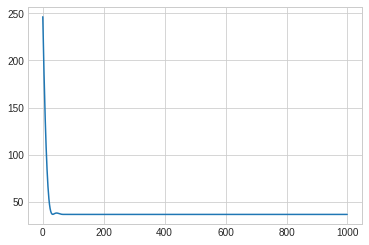

In [71]:
lr = LR()

X = X.reshape(100,1)
Y = Y.reshape(100,1)

lr.fit(torch.from_numpy(X.astype(np.float32)),torch.from_numpy(Y.astype(np.float32)))
lr.show_param()
lr.plot_loss()

In [72]:
X_test = (np.random.randn(10)*10 + np.random.randint(-10,10,10)).reshape(10,1)
X_test[1:10]

array([[ -4.18296668],
       [-14.71012258],
       [-24.73259444],
       [-13.33382739],
       [ -9.50239983],
       [  9.98089647],
       [ 14.4150043 ],
       [ -8.46740959],
       [ -3.87579597]])

In [ ]:
#torch.from_numpy(X_test.astype(np.float32))

#0.7642781 * X_test -0.31874114

tensor([[ -0.9262],
        [ -4.0423],
        [-11.9766],
        [-19.5306],
        [-10.9393],
        [ -8.0516],
        [  6.6330],
        [  9.9750],
        [ -7.2715],
        [ -3.8108]], grad_fn=<AddmmBackward>)


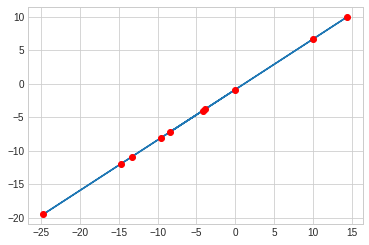

In [77]:
out = lr.predict(torch.from_numpy(X_test.astype(np.float32)))
print(out)
out = out.detach().numpy() 

plt.close()
plt.plot(X_test,out, label = "fitted-line")
plt.plot(X_test,out,'o', color= 'red', label="test points")
plt.show()